In [20]:
#ライブラリの読み込み
import os.path
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
from tqdm import tqdm
warnings.filterwarnings('ignore')
from datetime import datetime, date, timezone, timedelta
%matplotlib inline
!pip install folium
import folium

#グラフの設定
plt.style.use('ggplot')
#plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (15,10)

In [0]:
url = 'https://media.githubusercontent.com/media/TakatoMatsumoto/data_policy_studies/master/chapter_2/dataset/Chicago_Crimes_2012_to_2017.csv'
df = pd.read_csv(url, low_memory=False)

In [0]:
#reading in the data
#data = pd.read_csv('../input/Chicago_Crimes_2012_to_2017.csv')
#data.head()
data = df

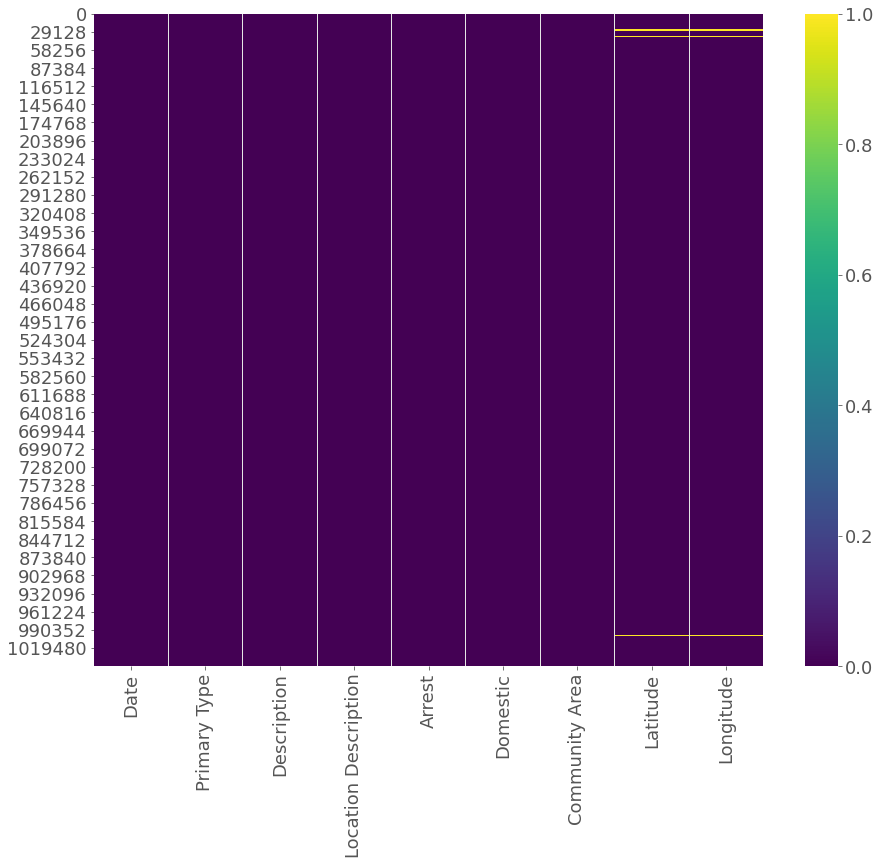

In [23]:
#drawing in the heatmap for seeing the amount of null values present in the data
plt.figure(figsize = (15, 12))
sns.heatmap(data.isnull(), cmap = 'viridis')

In [24]:
#removing the null values
data = data.dropna()

#removing the unnecessary data for the notebook
data = data.drop(columns=['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)

KeyError: ignored

In [0]:
#checking top 15 location where crimes had happeened
data['Location Description'].value_counts().iloc[:15]

In [0]:
#checking top 15 types of crimes which had happeened
data['Primary Type'].value_counts().iloc[:15]

In [0]:
#plotting top 15 location 
plt.figure(figsize = (10, 10))
sns.countplot(y = 'Location Description', data = data, order = data['Location Description'].value_counts().iloc[:15].index)

In [0]:
#plotting top 15 crime types
plt.figure(figsize = (10, 10))
sns.countplot(y = 'Primary Type', data = data, order = data['Primary Type'].value_counts().iloc[:15].index)

In [0]:
#grouping the data according to community area
location = data.groupby('Community Area').first()
location.head()

In [0]:
#extracting 4 features from the location dataframe i.e. Latitude, Longitude, Location Description, Arrest
new_location = location.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_location.head()

In [25]:
#creating the map for plotting the latitude and longitude in the Map
chicago_map = folium.Map(location = [41.799090, -87.790549], zoom_start = 10, tiles = 'CartoDB dark_matter')
chicago_map

In [26]:
#extracting the latitude and longitude and plotting them on Map 
for i in range(len(new_location)):
    
    #taking out latitude
    lat = new_location['Latitude'][i]
    
    #taking out latitude
    long = new_location['Longitude'][i]
    
    #popup text which when clicked on map will following three things on that particular location i.e. Community Index, Arrest, Location Description
    popup_text = """Community Index : {}<br><br>
                Arrest : {}<br><br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_location.index[i],
                               new_location.iloc[i][-1],
                               new_location.iloc[i][-2]
                               )
    
    #drawing the circles of radius 6 on map to show the location where the crime had happened
    folium.CircleMarker(location = [lat, long], radius = 6, popup = popup_text, fill = True).add_to(chicago_map)
    
#seeing the output map
chicago_map

In [27]:
#extracting out location which is our interest
unique_location = data['Location'].value_counts()
unique_location.index

KeyError: ignored

In [28]:
#creating a new dataframe which consists of latitude and longitude and sorted according the number of crimes happened on that location
new_unique_location = pd.DataFrame({'Raw String' : unique_location.index, 'Values Count': unique_location})
new_unique_location.index = range(len(unique_location))
new_unique_location.head()

NameError: ignored

In [0]:
#as our locatioin is in form of string so creating a function for extracing out the latitude and longitude
def location_extractor(string):
    
    values = string[1:-1].split(',')
    lat, long = values[0], values[1]
    
    return lat, long

In [30]:
#creating the new dataframe which comsists of the latitude and longitude in sorted on the basis of the number of crimes had happened
new_unique_location['Location Coord'] = new_unique_location['Raw String'].apply(location_extractor)
new_unique_location = new_unique_location.drop('Raw String', axis = 1)
new_unique_location.head()

NameError: ignored

In [31]:
#creating a new map
chicago_crime_map = folium.Map(location = [41.883500187, -87.627876698], zoom_start = 10, tiles = 'CartoDB dark_matter')
chicago_crime_map

In [32]:
%%time 
#for showing the time taken to draw the location on the map


#plotting circles on map a larger and red circle represent large number of crimes while a smaller blue circle represent the less number of crimes
for i in range(500):
    
    #extracting latitude
    lat = float(new_unique_location['Location Coord'].iloc[i][0])
    
    #extracting longitude
    long = float(new_unique_location['Location Coord'].iloc[i][1])
    
    #making radius dynamic on the basis of number of crimes
    radius = float(new_unique_location['Values Count'].iloc[i]) / 40
    
    # if number of crimes are more than 1000 then circle will be red in color else blue in color 
    if float(new_unique_location["Values Count"].iloc[i]) > 1000:
        color = '#FF4500'
    else:
        color = '#008080'
        
    #creating the popup text which will show Latitude, Longitude and Number of crimes happened on place when clicked on Map
    popup_text = """Latitude : {}<br><br>
                    Longitude : {}<br><br>
                    No of Crime Incident : {}<br><br>"""
    
    popup_text = popup_text.format(lat, long, new_unique_location['Values Count'][i])
    
    
    #drawing circles on map with different color and dynamic radius
    folium.CircleMarker(location = [lat, long], radius = radius, color = color, popup = popup_text, fill = True).add_to(chicago_crime_map)

NameError: ignored

In [0]:
chicago_crime_map

In [0]:
#extracting crimes which are theft and doing analysis on them
data_theft = data[data['Primary Type'] == 'THEFT']
data_theft.head()

In [0]:
#drawing the countplot for showing description of theft which had happened 
plt.figure(figsize = (15, 12))
sns.countplot(y = data_theft['Description'])

In [0]:
#creating a new dataframe which consists of description sorted on the basis of their number
new_data_theft = pd.DataFrame({'Counts' : data_theft['Description'].value_counts(), 'Description' : data_theft['Description'].value_counts().index})
new_data_theft.reset_index(inplace=True)
new_data_theft = new_data_theft.drop(columns = ['index'], axis = 1)
new_data_theft.head()

In [0]:
#drawing the bar plot with description on y axis while number of times that happened on x axis
plt.figure(figsize = (12, 10))
sns.barplot(y = 'Description', x = 'Counts', data = new_data_theft, palette="jet_r")

In [0]:
%%time
#converting the data into python readable format
data_theft['Date'] = pd.to_datetime(data_theft['Date'])
data_theft.head()

In [0]:
#extracting the month from the date and doing analysis on number of crimes happened on particular month
data_theft['Month'] = data_theft['Date'].apply(lambda x : x.month)

In [0]:
#creating dataframe which consists of 12 month and the number of crimes happened on that month 
crime_month = pd.DataFrame({'Crime Count' : data_theft['Month'].value_counts(), 'Month' : data_theft['Month'].value_counts().index})
crime_month = crime_month.sort_values(['Month'], ascending = True)
crime_month.reset_index(inplace = True)
crime_month = crime_month.drop(columns = ['index'], axis = 1)
crime_month

In [0]:
#plotting the trends of crimes happening in each month
plt.figure(figsize = (15, 7))
plt.plot(crime_month['Month'], crime_month['Crime Count'], label = 'Total theft')
plt.plot(crime_month['Month'], crime_month['Crime Count'].rolling(window = 2).mean(), label = 'Moving Average', linewidth = 4, color = 'red')

plt.title('Thefts per Month')
plt.legend(prop = {'size' : 16})
plt.xlabel('Month')
plt.show();

In [0]:
#resampling the data on DAY('D') basis and taking the mean and standard deviation of the data for plotting purpose
data_theft_dates = data_theft['Location']
data_theft_dates.index = data_theft['Date']
resampled = data_theft_dates.resample('D')
data_theft_dates['MEAN'] = resampled.size().mean()
data_theft_dates['STD'] = resampled.size().std()

In [0]:
#calculating the Upper Chart Limit(UCL) and Lower Chart Limit(LCL)
UCL = data_theft_dates['MEAN'] + 3 * data_theft_dates['STD']
LCL = data_theft_dates['MEAN'] -  3 * data_theft_dates['STD']

In [0]:
%%time

#plotting the data on crimes happening on daily basis
plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Thefts on a daily basis", color = 'red')
plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Number of crimes', fontsize = 15)
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})
plt.show()